In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('immobiliers.csv')

In [8]:
# on ne s'interesse que sur les biens à vendre
# execute right after reading the csv, marra wahda barka
df = df[df['Type de transaction'] == 'À Vendre']
df = df.drop(columns=['Type de transaction'])
df.reset_index(drop=True, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Localisation              755 non-null    object 
 1   Configuration des pièces  350 non-null    object 
 2   Superficie                755 non-null    object 
 3   Chambres                  755 non-null    object 
 4   Type de bien              206 non-null    object 
 5   Annonce                   755 non-null    object 
 6   Prix                      622 non-null    float64
 7   Salles de bains           755 non-null    object 
dtypes: float64(1), object(7)
memory usage: 47.3+ KB
None


In [9]:
condition1 = df[(df['Configuration des pièces'].notna()) & (df['Chambres']=='False')]
# print(condition1.shape)
# 11 row où nb chambres n'est affiché que dans l'annonce

# Extraire le nombre de pièces de 'Configuration des pièces' et l'attribuer à 'Chambres'
for idx, row in condition1.iterrows():
    config_pieces = row['Configuration des pièces']
    match = re.search(r'S\+(\d+)', config_pieces)
    if match:
        df.at[idx, 'Chambres'] = int(match.group(1))

df = df.drop(columns=['Configuration des pièces']) # on n'en a plus besoin
df.tail()

,Localisation,Superficie,Chambres,Type de bien,Annonce,Prix,Salles de bains
750,Sfax,False,2,Appartement,Appartement (C2-8) en S+2 au deuxième étage,286269.0,False
751,Sfax,125.8,2,Appartement,Appartement (C2-9) en S+2 au deuxième étage,232730.0,1
752,Sfax,183.21,3,Appartement,Appartement (A4-9) en S+3 au quatrième étage,338939.0,3
753,Sfax,202.79,3,Appartement,Appartement (C2-3) en S+3 au deuxième étage,375162.0,3
754,Sfax,191.02,3,Appartement,Appartement (C2-6) en S+3 au deuxième étage,353387.0,3


In [10]:
# Remplacer toutes les valeurs 'False' dans les colonnes 'Superficie' et 'Chambres' par NaN
df['Superficie'] = df['Superficie'].replace(['False'], np.nan)
df['Chambres'] = df['Chambres'].replace(['False'], np.nan)

# Remplacer toutes les valeurs 'False' dans la colonne "Salles de bains" par la valeur par défaut 1
df['Salles de bains'].replace('False', 1, inplace=True)

df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce') # convertir en numérique

C:\Users\My_Computing\AppData\Local\Temp\ipykernel_19332\2422662689.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salles de bains'].replace('False', 1, inplace=True)


In [11]:
df.tail()

,Localisation,Superficie,Chambres,Type de bien,Annonce,Prix,Salles de bains
750,Sfax,NaN,2,Appartement,Appartement (C2-8) en S+2 au deuxième étage,286269.0,1
751,Sfax,125.8,2,Appartement,Appartement (C2-9) en S+2 au deuxième étage,232730.0,1
752,Sfax,183.21,3,Appartement,Appartement (A4-9) en S+3 au quatrième étage,338939.0,3
753,Sfax,202.79,3,Appartement,Appartement (C2-3) en S+3 au deuxième étage,375162.0,3
754,Sfax,191.02,3,Appartement,Appartement (C2-6) en S+3 au deuxième étage,353387.0,3


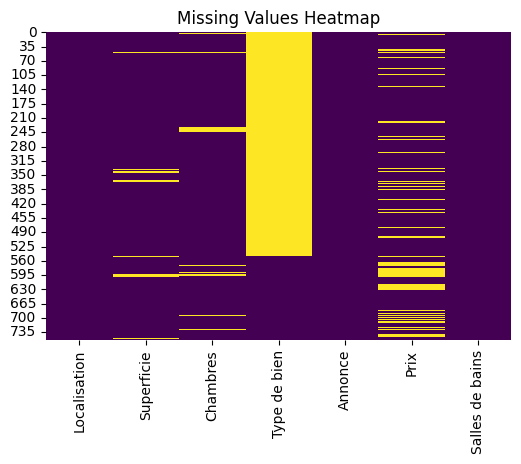

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [13]:
# On s'interesse dans cette partie aux valeurs manquantes dans la colonne type de biens
print("Value counts for 'Type de bien':\n", df['Type de bien'].value_counts())
print("Missing values in 'Type de bien' column: ", df['Type de bien'].isnull().sum())

Value counts for 'Type de bien':
 Type de bien
Appartement         131
Local Commercial     25
Bureau               22
Villa                15
Duplexe              11
Penthouse             2
Name: count, dtype: int64
Missing values in 'Type de bien' column:  549


In [14]:
keywords = {
    'appartement': 'Appartement',
    'villa': 'Villa',
    'maison': 'Maison'
}
# chercher dans les annonces les keywords qui nous interessent
for keyword, replacement in keywords.items():
    condition = df['Annonce'].str.contains(keyword, case=False, na=False)
    df.loc[condition & df['Type de bien'].isna(), 'Type de bien'] = replacement

In [15]:
# suite aux observations, les données non labelisées correspondent à des appartements
df.loc[df['Type de bien'].isna() & df['Chambres'].notna(), 'Type de bien'] = 'Appartement'

In [16]:
# verification
print("Value counts for 'Type de bien':\n", df['Type de bien'].value_counts())
print("Missing values in 'Type de bien' column: ", df['Type de bien'].isnull().sum())

Value counts for 'Type de bien':
 Type de bien
Appartement         517
Villa               125
Maison               34
Local Commercial     25
Bureau               22
Duplexe              11
Penthouse             2
Name: count, dtype: int64
Missing values in 'Type de bien' column:  19


In [17]:
# Apres la visualtion des nvlles données, on a remarqué que les données 
# manquantes restantes dans la colonne 'Type de bien' sont des
# biens commerciaux dont on n'aura pas besoin reellement

# Garder uniquement les lignes où 'Type de bien' est 'appartement', 'maison', ou 'villa'
df = df[df['Type de bien'].isin(['Appartement', 'Maison', 'Villa'])]

df = df.drop(columns=['Annonce']) # on n'en a plus besoin

In [18]:
# pour chaque groupe de Prix, nous allons remplir les valeurs manquantes par la médiane de ce groupe (pour éviter les outliers)
df.loc[:, 'Prix'] = df.groupby(['Localisation', 'Chambres'])['Prix'].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

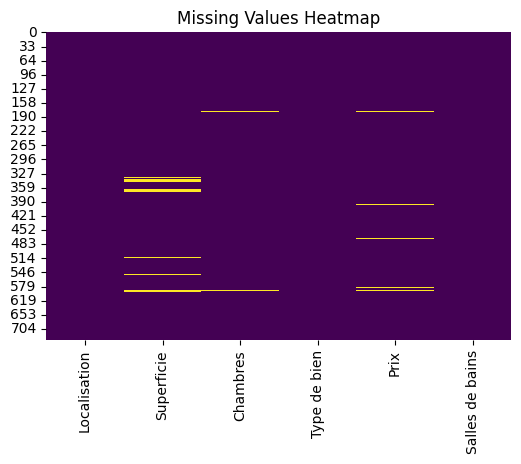

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [20]:
df.to_csv('cleaned_immobiliers.csv', index=False, encoding='utf-8')